In [1]:
from pathlib import Path

import albumentations as A
import cv2
import matplotlib.pyplot as plt

import utils

plt.rcParams["savefig.bbox"] = 'tight'

In [2]:
%load_ext autoreload
%autoreload 2

In [233]:
BOX_COLOR = (255, 0, 0)  # Red
TEXT_COLOR = (255, 255, 255)  # White


def visualize_bbox(img, bbox, class_name, color=BOX_COLOR, thickness=2):
    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)

    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)

    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.6, 1)
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(
        img,
        text=class_name,
        org=(x_min, y_min - int(0.3 * text_height)),
        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
        fontScale=0.6,
        color=TEXT_COLOR,
        lineType=cv2.LINE_AA,
    )
    return img


def visualize_bboxes(image, bboxes, classes):
    img = image.copy()
    for bbox, cls in zip(bboxes, classes):
        img = visualize_bbox(img, bbox, cls)
    return img


def visualize(image, bboxes, classes):
    img = visualize_bboxes(image, bboxes, classes)
    plt.figure(figsize=(12, 12))
    plt.axis('off')
    plt.imshow(img)


def visualize_grid(images, ncols=4):
    nrows = len(images) // ncols
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 24))
    fig.subplots_adjust(hspace=0.00, wspace=0.00)
    for i, image in enumerate(images):
        row = i // ncols
        col = i % ncols

        if col == 0:
            axes[row, col].set_ylabel('mob', rotation=0, labelpad=20)
        if row == nrows - 1:
            axes[row, col].set_xlabel('biome', labelpad=8)
        axes[row, col].tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=False, colors='white')

        axes[row, col].imshow(image)



In [205]:
img = utils.bgr2rgb(utils.read_image(Path('data/raw/label/00_zombie/images/00_plains_0_00.jpg')))
label = utils.read_label(Path('data/raw/label/00_zombie/labels/00_plains_0_00.txt'))

In [206]:
bbox = A.convert_bbox_from_albumentations(
    A.convert_bbox_to_albumentations(label[1], source_format='yolo', rows=img.shape[0], cols=img.shape[1]),
    target_format='coco', rows=img.shape[0], cols=img.shape[1]
)

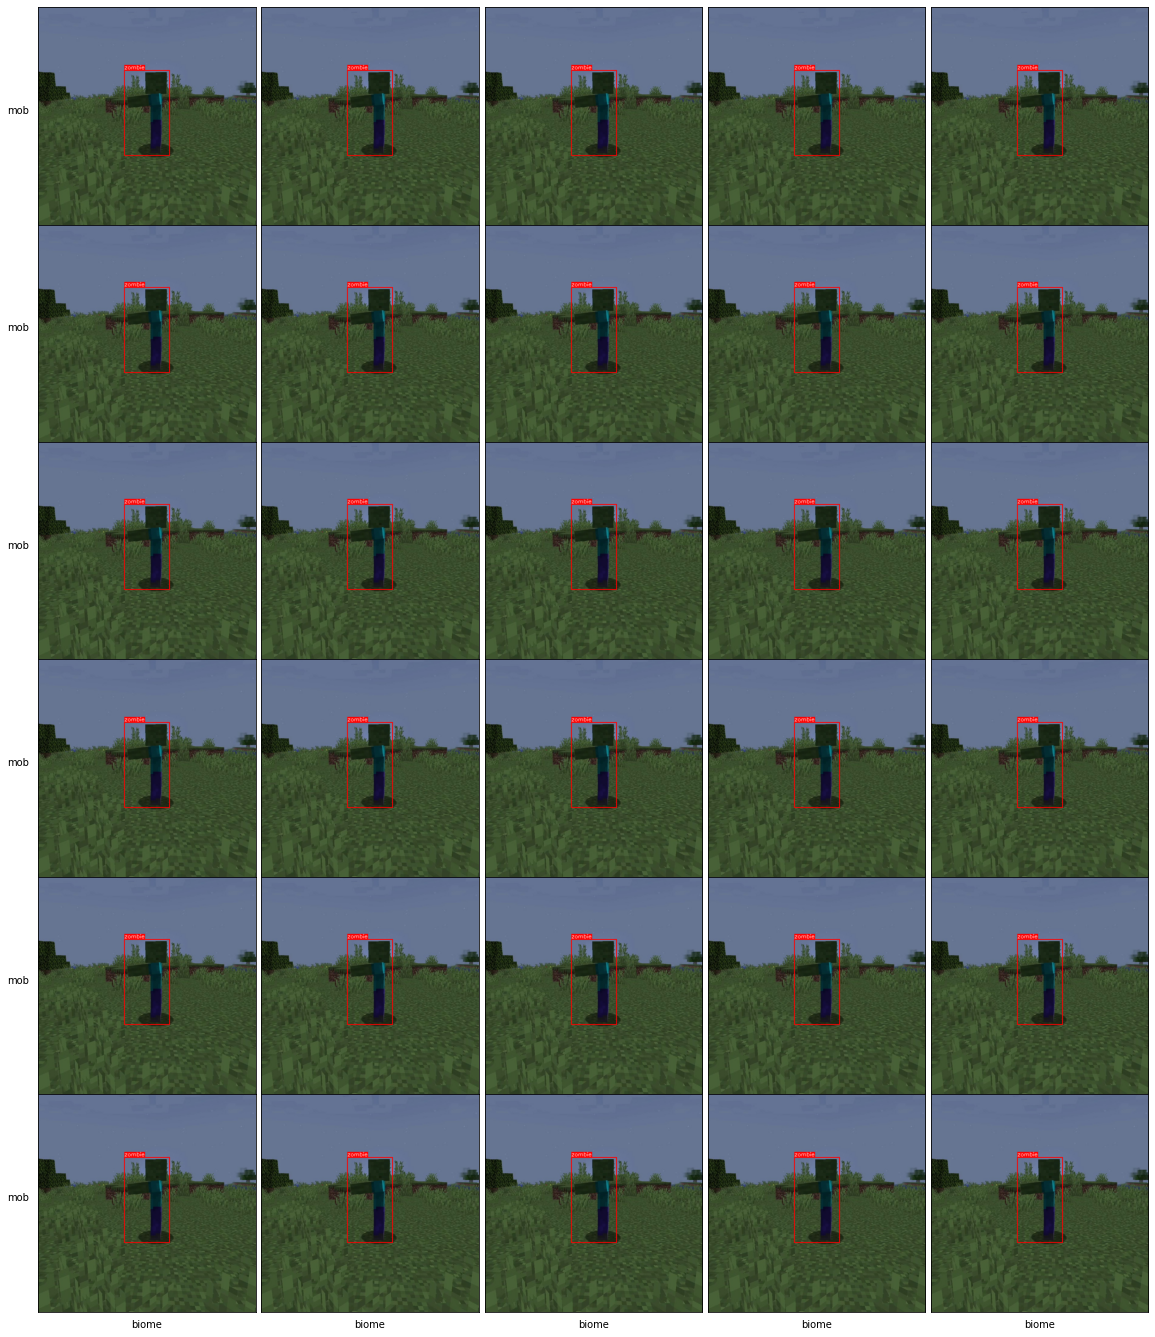

In [232]:
img_with_bbox = visualize_bboxes(img, [bbox], ['zombie'])
visualize_grid([img_with_bbox for _ in range(30)], ncols=5)

In [3]:
def identify_axes(ax_dict, fontsize=48):
    kw = dict(ha="center", va="center", fontsize=fontsize, color="darkgrey")
    for k, ax in ax_dict.items():
        ax.text(0.5, 0.5, k, transform=ax.transAxes, **kw)
        utils.reset_axes(ax)

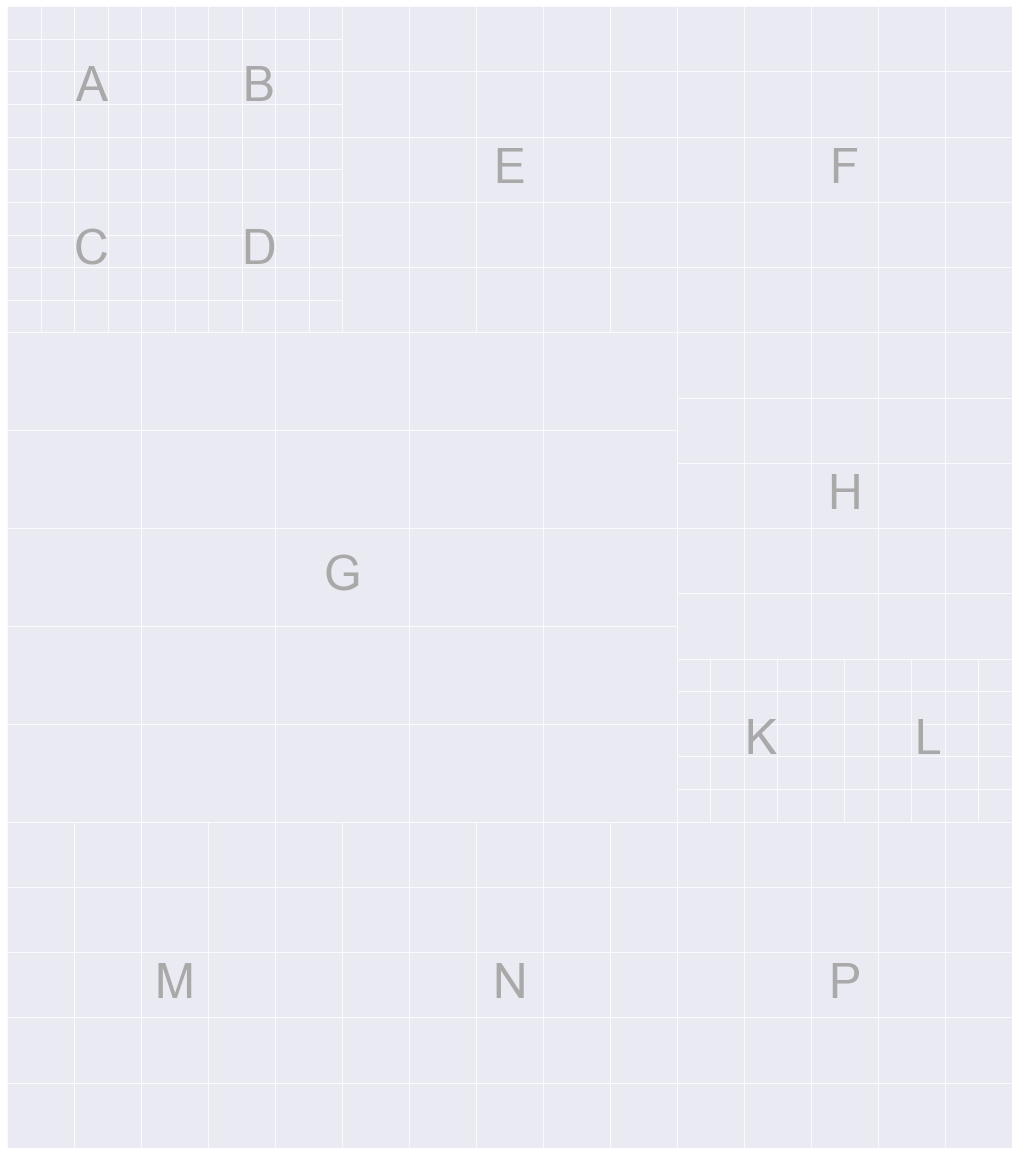

In [22]:
fig = plt.figure(figsize=(18, 21))
fig.subplots_adjust(hspace=0.00, wspace=0.00)
axd = fig.subplot_mosaic(
    """
    ABEEFF
    CDEEFF
    GGGGHH
    GGGGHH
    GGGGKL
    MMNNPP
    MMNNPP
    """
)
identify_axes(axd)

In [236]:
axd

{'A': <AxesSubplot:label='A'>,
 'B': <AxesSubplot:label='B'>,
 'D': <AxesSubplot:label='D'>,
 'C': <AxesSubplot:label='C'>}

In [26]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np

In [27]:
scaler = MinMaxScaler()
scaler.fit_transform(np.array([[1, 0, 1, 2, 3, 255, 192, 0, 1, 0, 16]]))

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [29]:
scaler = StandardScaler()
scaler.fit_transform(np.array([0, 0, 1, 2, 3, 255, 192, 0, 1, 0, 0]).reshape(1, -1))

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [33]:
scaler = StandardScaler()
X = np.array([1, -4, 5, 6, -8, 5]) # here should be your X in np.array format
X_transformed = scaler.fit_transform(X.reshape(1, -1))
X_transformed

array([[0., 0., 0., 0., 0., 0.]])